## 딥러닝3(Transformer)_사전과제_안가은

### 1. 어텐션의 등장
#### 1-1) Attention

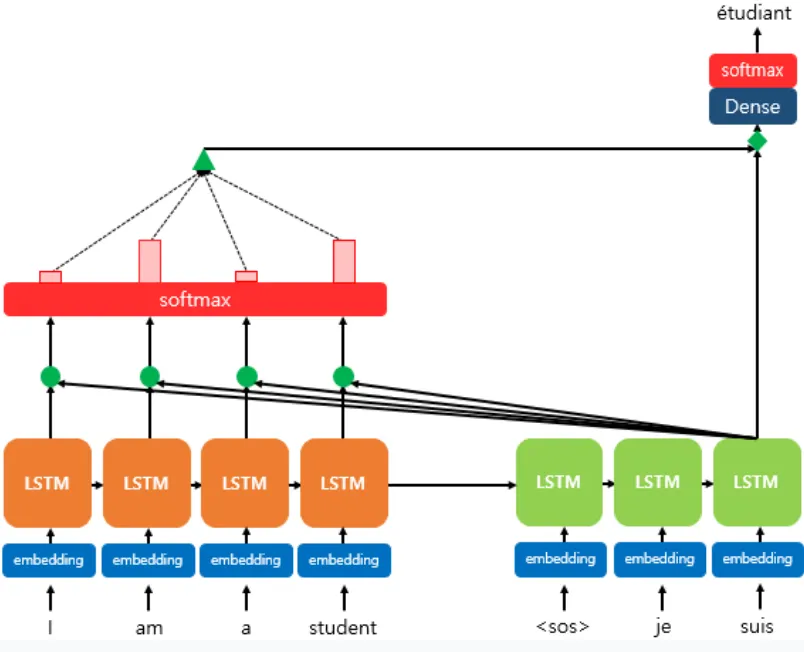

* 결과를 만들 때, 입력값의 모든 부분을 동일하게 보지 말고 지금 이 순간 가장 중요한 부분에 더 높은 가중치를 부여해서 참고
* seq2seq2의 병목 현상 해결 - 출력 시점마다 새로운 context vector를 동적으로 계산함 (병렬화)
* 과정
  1. 입력을 벡터 형태로 변환해 수치화 (h_1,..,h_n)
  2. 각 요소 별 중요도 점수 산출: 현재 처리중인 작업 기준으로 어떤 단어에 집중해야할 지 선택함          
    2-1) 관련도 채점(Score): 단어 사이의 관계, 유사성 측정      
    2-2) 중요도 배분(Softmax): 이 점수를 0~1사이 값으로 변환해, 모든 단어의 중요도 합치면 1이 되도록 조정 (=**어텐션 가중치**)
  3. 중요도에 따른 입력 정보 조합
* 장점
  1. 시간 경과에 따른 유연성: RNN의 장기 의존성 문제 해결 
  2. 공간에 대한 유연성: CNN의 고정된 필터로 인한 local만 학습되는 문제 해결
  3. 병렬화: self-attention에서 다른 단어의 계산 기다릴 필요 없이 모든 단어를 독립적으로, 한번에 해결 가능

#### 1-2) Attention is All You Need
* Transformer 구조 (Self-Attention 방식)를 처음 발표한 논문.
* 순차적 계산 구조를 아예 제외하고 아예 Attention만을 사용하는 모델.        
  -> Recurrence와 Convolution이 필수가 아님을 증명, 병렬화 가능해져서 학습 속도 단축, 거대 데이터를 다룰 수 있는 모델 제작이 가능해짐.          
  -> LLM 탄생, NLP 평정, 타 분야로의 확장

* Transformer

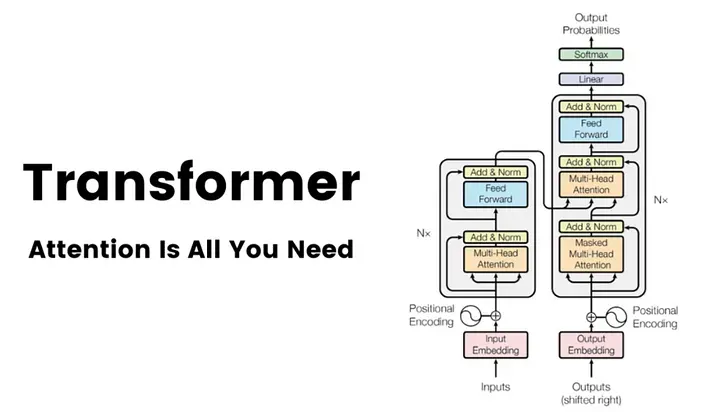

> * Attention만으로 인코더와 디코더 구현.
> * 핵심 기술: Self-Attention(문장 안에서 어떤 단어가 다른 단어와 얼마나 중요한 관계인지 파악), Multi-Head Attention(셀프 어텐션을 여러개의 head로 동시에, 다른 관점에서 수행), Positional Encoding(단어의 위치 정보를 벡터에 추가)
> * 즉 context vector 부분 뿐만 아니라 인코더와 디코더 마저 Attention 메커니즘으로 재현한 것.

### 2. Self-Attention
#### 2-1) Query, Key, Value
: 모델이 수많은 정보 안에서 가장 관련 있는 정보를 효과적으로 찾아내기 위해 3가지 역할로 분할

1. Query: 요청. 지금 내가 알고 싶거나 초점을 맞추고 있는 대상 (ex. '서강대학교 인사이트 14기 인원')(문장 속 자기 자신 단어)

2. Key: 검색 대상이 되는 모든 정보들이 달고있는 이름표. 쿼리는 키들과 자신을 비교하여 얼마나 관련 있는지 확인함 (ex. 14기 인원의 학번)(문장 내 모든 단어들)

3. Value: 키와 한 쌍인 실제 내용물. 쿼리와 키의 관련도 계산이 끝난 후, 모델은 가장 관련성이 높은 키의 밸류를 가져와 사용함 (ex. 해당하는 학번의 학생의 정보)(특정 단어와 연관이 깊은 다른 단어의 실제 의미 정보로 자신의 의미 보강)

#### 2-2) 기존 Cross-Attention vs. Self-Attention

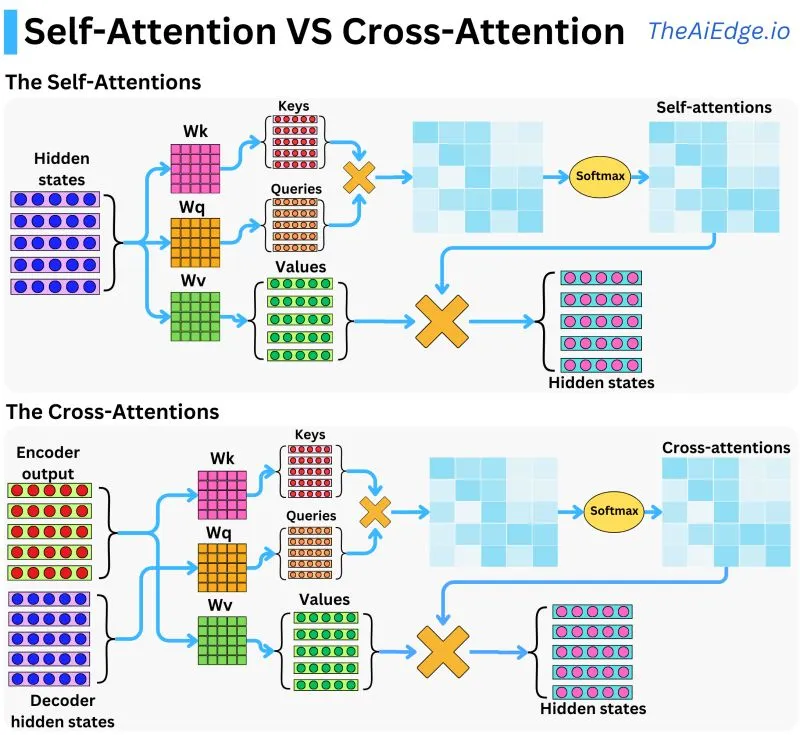

* 기존 Attention (Cross-Attention)
  + 하나의 시퀀스가 완전히 다른 시퀀스르 참고하여 정보를 만드는 알고리즘. (디코더가 인코더를 참고)
  + Query와 key-value쌍이 서로 다른 시퀀스에서 출력됨
  + 단계
    1. Query 만들기: 디코더는 지금까지 생성된 단어들 보고 현재 상태를 하나의 벡터(Query)로 요약
    2. Key, Value 불러오기: 인코더는 입력문장을 처리해 각 단어에 대한 벡터 가지고 있음 (key, value 쌍)
    3. 유사도 계산 (attention score): Query가 인코더의 각 key와 유사도 계산함 (Q ● K_i 내적). Softmax로 정규화해서 전체가 1이 되도록 가중치로 변환
    4. Weighted Sum: 인코더의 value들을 그 가중치로 섞어줌
    5. 디코더가 다음 단어 예측

* Self-Attention
  + 문장 자체를 뜯어보며 내부의 관계 파악
  + Query와 key-value쌍이 같은 시퀀스에서 출력됨.
  + 단계
    1. 벡터 임베딩: 각 단어의 고유한 특징 담은 벡터로 변환
    2. 단어간 점수 계산: 모든 단어 벡터끼리 관련성에 대한 '관계 점수'(정렬 점수) 계산
    3. 중요도 배분: attention weight로 변환. 즉 특정 단어를 이해하는데 다른 단어들이 각각 몇% 중요한지 알 수 있음
    4. 문맥이 반영된 벡터 생성.

#### 2-3) Scaled Dot-Product Attention
1. Dot Product Attention : Attention Score를 계산하는 기본적인 방법. 쿼리와 키 벡터를 내적하여 유사도 구함

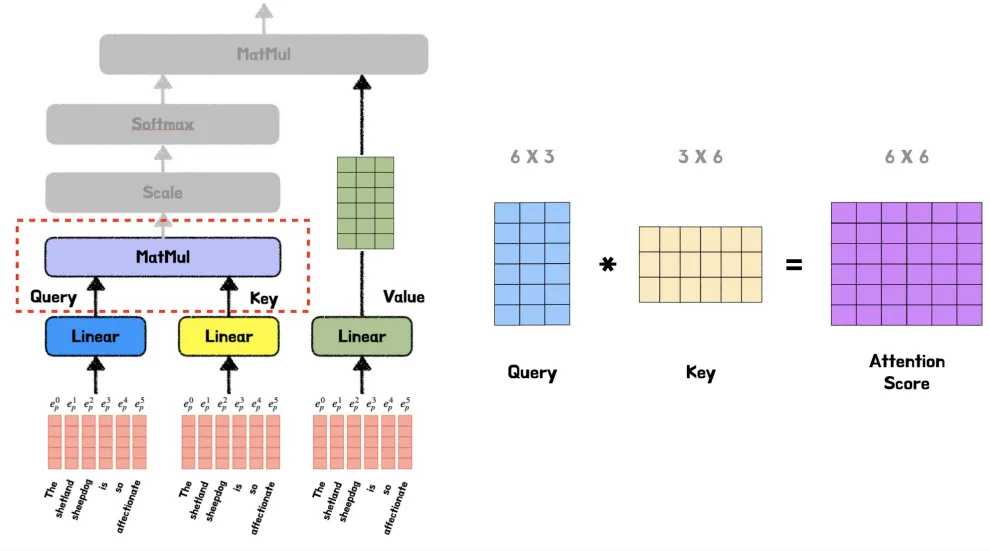

> * 그러나 벡터의 차원 d_k가 커질수록 내적의 결과가 너무 커지거나 작아짐 -> 기울기 소실 문제 발생

2. Scaled Dot-Product Attention: 위의 방식을 개선한 트랜스 포머 방식의 표준. 즉 트랜스포머의 어텐션 계산 공식 자체를 의미한다.

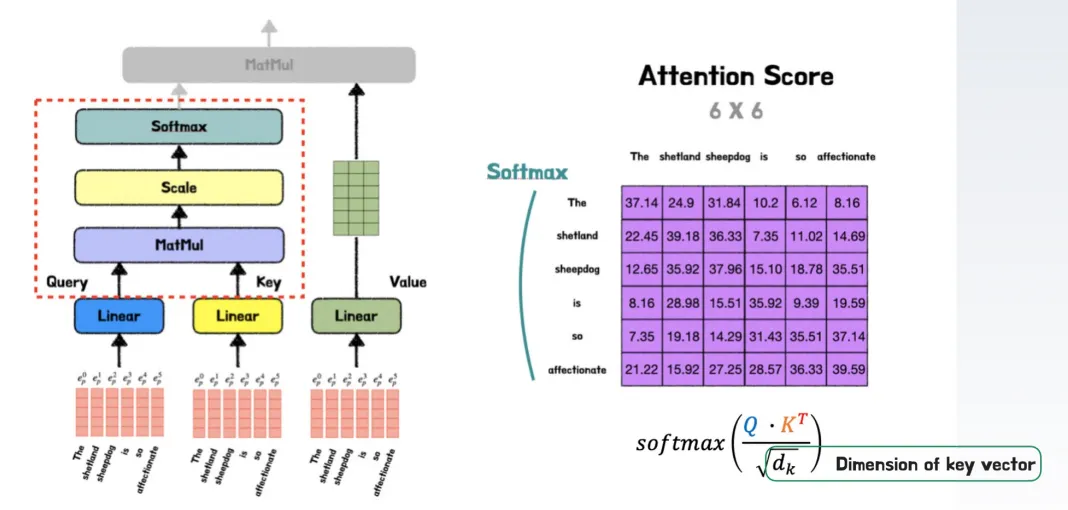

> * dot-producy attention 내적 진행 후, 값의 크기 맞추기 위해 sqrt(d_k)로 나누어 스케일링 진행함.

### 3. Multi-Head Attention
#### 3-1) Multi-Head Attention
* 인코딩된 토큰들을 아키텍처가 이해할 때 사용됨
* single-head attention과 다르게 한 단어와 다른 단어와의 관계를 여러 차원으로 나누어 병렬로 학습. (ex. 512차원의 입력 벡터 -> 64개씩 8벡터로 나눔 -> attention score 병렬로 여러 번 계산)

#### 3-2) Multi-Head Attention 작동 방식
: "I love you"에서 'love' 단어 벡터가 통과하는 과정. (단어의 차원:512, 어텐션 헤드 수: 8, 각 헤드의 차원: 64)

1. 분할(Projection): love라는 단어 나타내는 하나의 512차원 벡터 들어옴. 이 벡터를 8개의 그룹(Q,K,V)으로 투영해 8개의 서로 다른 관점으로 나눔

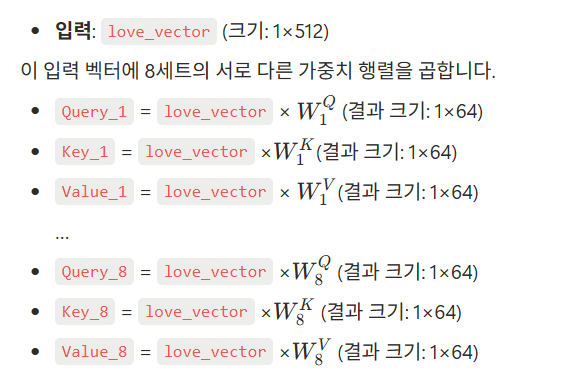

2. 병렬 어텐션 계산: 8개의 헤드들이 서로 간섭하지 않고, 병렬로 scaled dot-product attention 계산함.

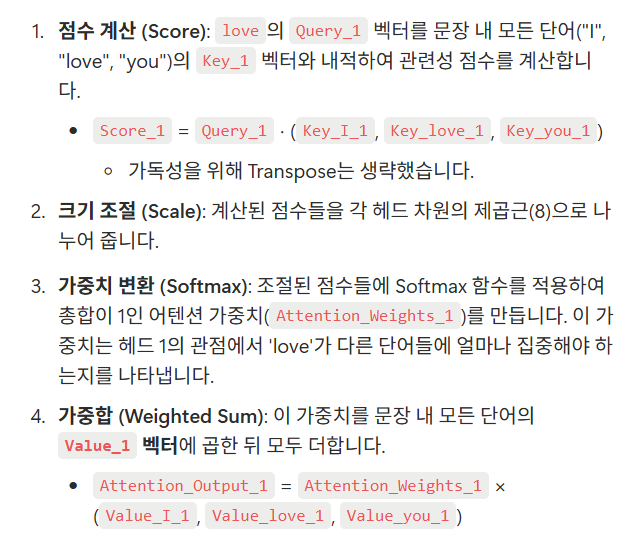

> * 이 결과로 헤드 1의 관점에서 문맥을 이해한 64차원의 결과벡터인 **Attention_Output_1**이 나옴
> * 같은 방식으로 헤드8까지 독립적으로 일어남

3. 결합 및 최종 투영: 8개의 헤드 각자 내놓은 8개의 분석 결과를 하나로 합침

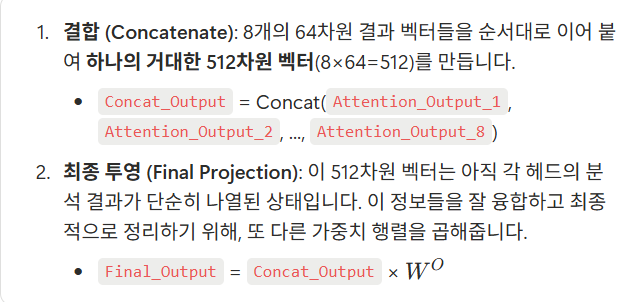

> * 이 final_output이 바로 love에 대한 multi-head attention 레이어의 최종 출력 벡터임. 8개의 다른 관점에서 분석된 정보가 조합된 문맥적 의미 담고 있음.

### 4. Transformer 전체 아키텍처

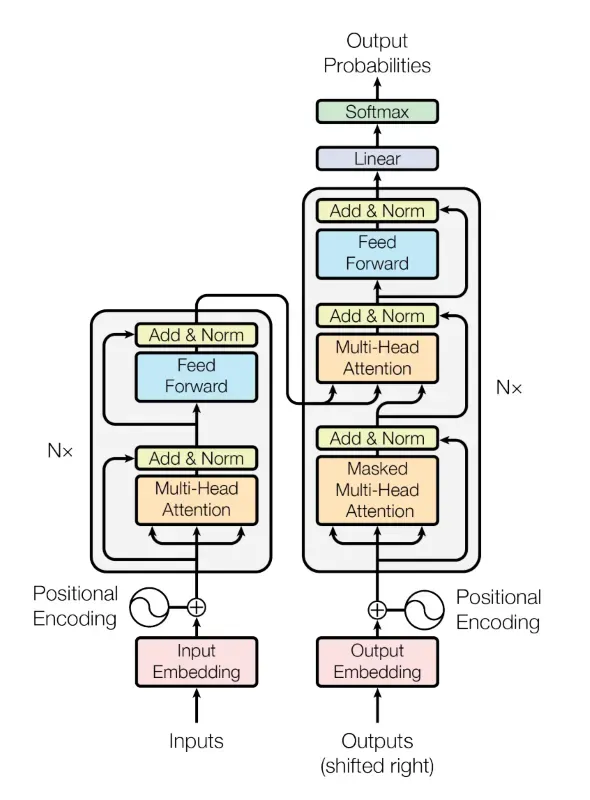

#### 4-1) 트랜스포머의 전처리 단계
1. 토큰화: 입력 텍스트를 모델이 처리할 수 있는 단위(tokens)로 나누는 단계.

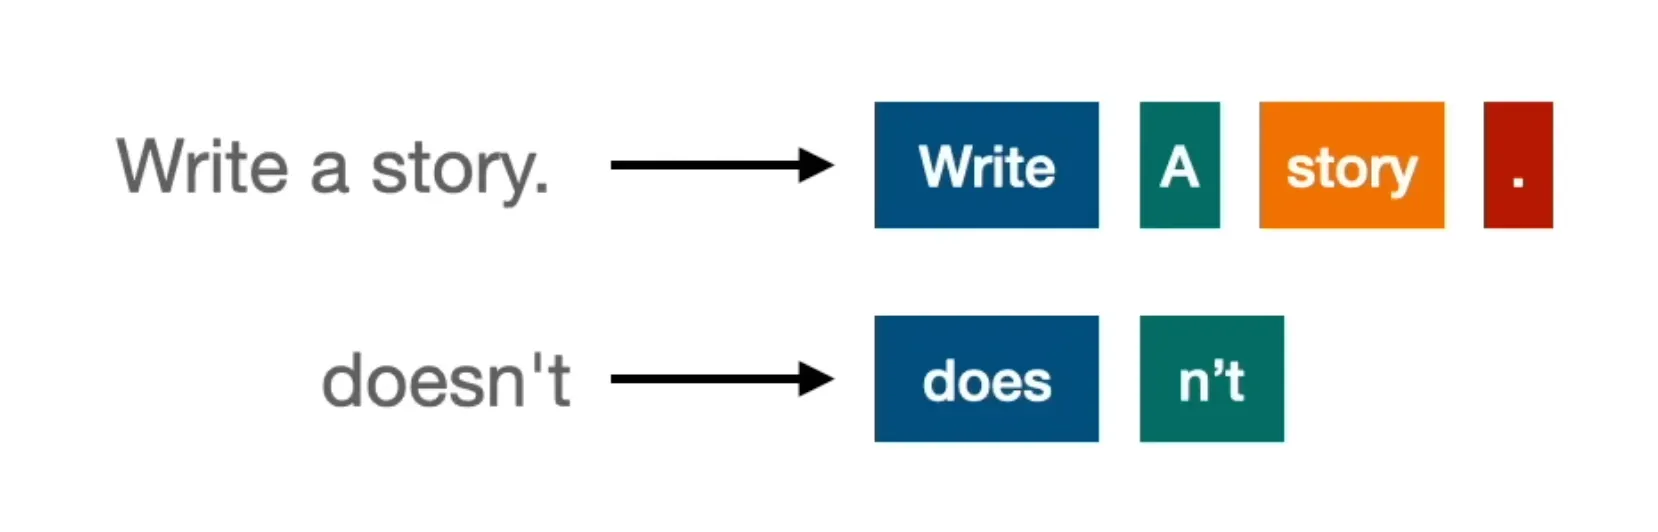

> 1. 대부분 각 토큰은 하나의 단어
> 2. 문장 부호도 별도의 토큰 가짐
> 3. 일부 단어는 하나 이상의 토큰이 될 수 있다 (doesn't)

2. 임베딩: 토큰을 숫자의 벡터로 변환. 벡터의 길이가 벡터의 차원이 된다.
   * 의미적으로 유사한 단어들이 임베딩 공간에서 유사한 숫자(좌표)로 변환 되는 것! (단어의 의미 공간적으로 표현)
   * Word2Vec: 가장 일반적이고 강력한 임베딩 생성 방법 중 하나

3. Positional Encoding: 단어들의 순서 정보를 임베딩 벡터에 추가. 같은 단어도 문장에서 차지하는 위치가 다르면 최종적으로 다른 좌표(수정된 임베딩) 가지게 됨. 모델이 순서 학습 할수 있도록 한다.
   * 각 단어의 임베딩 좌표에 일관된 순서를 따르는 다른 숫자를 추가
    + **일관된 순서**: 문장이나 단어에 관계 없이, 위치에 따라 정해진 동일한 수정 벡터 사용 (각 '위치'마다 정해진 벡터를 더해 이동시킴)
    + 이 **정해진 벡터** 수열이 바로 일관된 순서이다. (트랜스 포머는 사인, 코사인 함수 사용해서 생성)

#### 4-2) 트랜스포머의 인코더와 디코더

1. 인코더

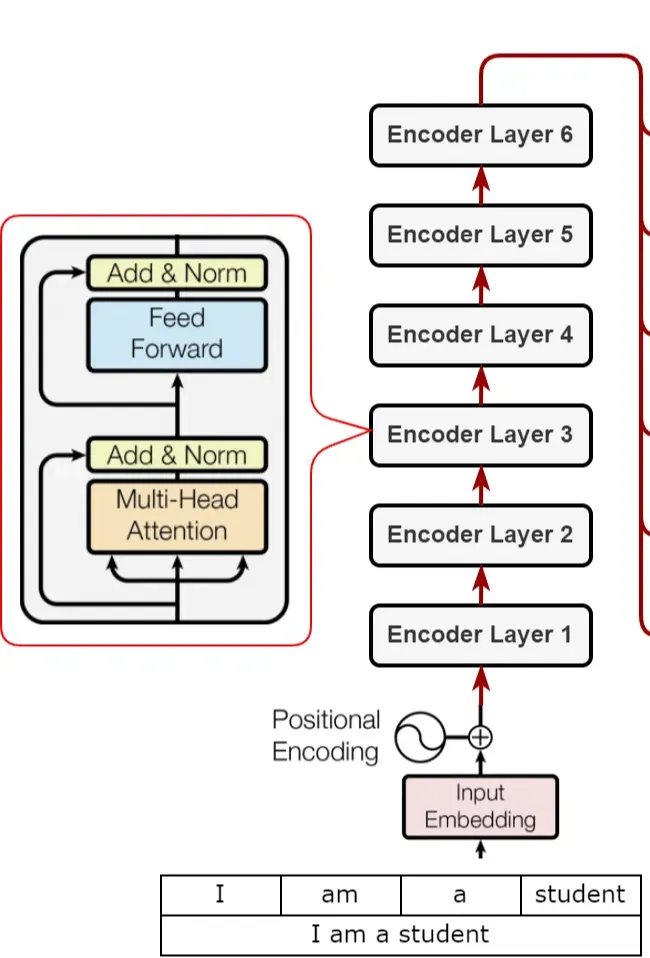

> * 입력 문장을 이해하고 요약된 의미 벡터로 변환하는 역할. 전처리 과정 및 인코더 레이어로 구성됨
> * 왼쪽 그림이 인코더 레이어. Multi-Head Attention과 Feed-Forward 의 두 가지 주요 하위 레이어로 구성됨.

* Feed-Forward (FNN)
  + 입력 벡터의 차원을 확장하고 비선형 변환(ex.ReLU)을 적용하여 새로운 표현을 생성하는 신경망 구조.
  + 입력된 문장을 번역할 때 각 단어에 대해 FNN(MLP 2층으로 완전 연결된 구조) 거쳐 심층 분석.

* Add & Norm - Residual connections (잔차 연결)

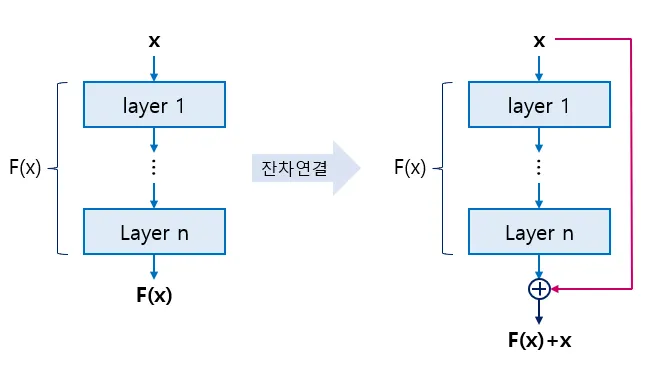

> * 입력 값을 그대로 출력값에 더해준다.
> * CNN의 ResNet 모델에 나온 방법. 왼쪽 그림처럼 층이 쌓여 기울기 소실 및 폭주 현상이 발생하는 것을 해결하기 위해 오른쪽 그림처럼 지름길을 만들어 출력에 입력값을 바로 전달해 주는 것.
> * layer가 많이 쌓여도 학습이 잘 되게 된다.

* Layer Normalizaiton(층 정규화): 입력 벡터의 평균과 분산을 사용해 정규화함. 학습을 안정화하고 모델이 빠르게 수렴하게 해준다.

2. 디코더

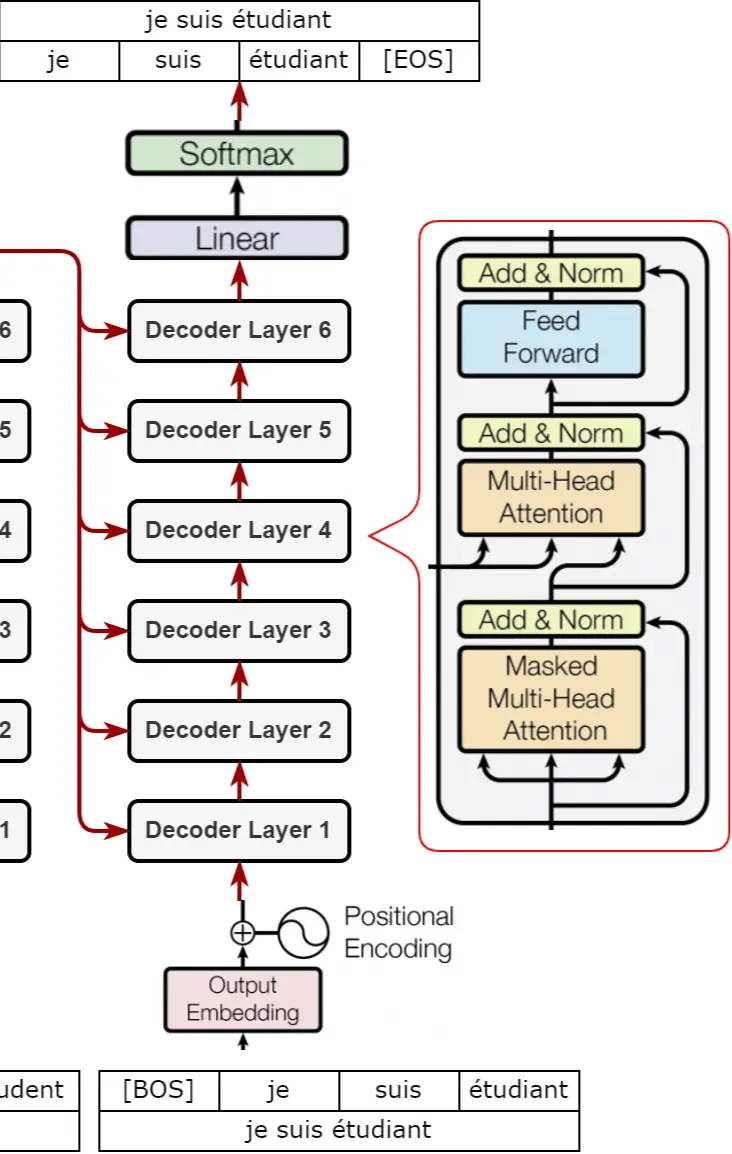

> * 인코더가 분석한 입력 문장의 의미 벡터를 받아 출력 문장을 순차적으로 생성하는 역할.
> * 전처리 과정, 디코더 레이어, 선형 레이어, 소프트맥스 레이어로 이루어짐
> * 우측 그림이 디코더 레이어. Masekd Multi-Head Attention, Encoder-Decoder Multi-Head Attention(Cross-Attention), Feed-Forward Layer로 이루어짐.

* Masked Multi-Head Attention
  + 미래 시점의 단어 정보를 참고하지 못하도록 마스크를 적용하는 어텐션 메커니즘.
  + 트랜스포머의 디코더는 look-ahead mask(causal mask)사용해 현재 단어보다 오른쪽(미래)에 있는 토큰의 어텐션 값을 0으로 만들어 무시함.

* Encoder-Decoder Attenttion (Cross-Attention)
  + 디코더가 인코더의 출력을 참고하며 현재 생성중인 단어를 입력 문장의 의미와 연결하는 과정.
  + 디코더가 입력 문장의 어떤 부분에 주목해야 하는지 학습함.

#### 4-3) 전체 모델 및 데이터 흐름
1. 입력 준비: 문장을 의미+위치 벡터로 바꿈 (임베딩, 포지셔널 인코딩)
2. 인코더: 입력 문장의 문맥적 의미 이해하기 (셀프 어텐션, 관계점수 계산, 가중합, 멀티-헤드) -> 최종 출력: 입력문장의 context vectors(문맥 의미 모두 반영한 벡터들의 집합)
3. 디코더: 번역 문장을 한 단어씩 생성(context vectors 참조하여 토큰 생성.)